   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.

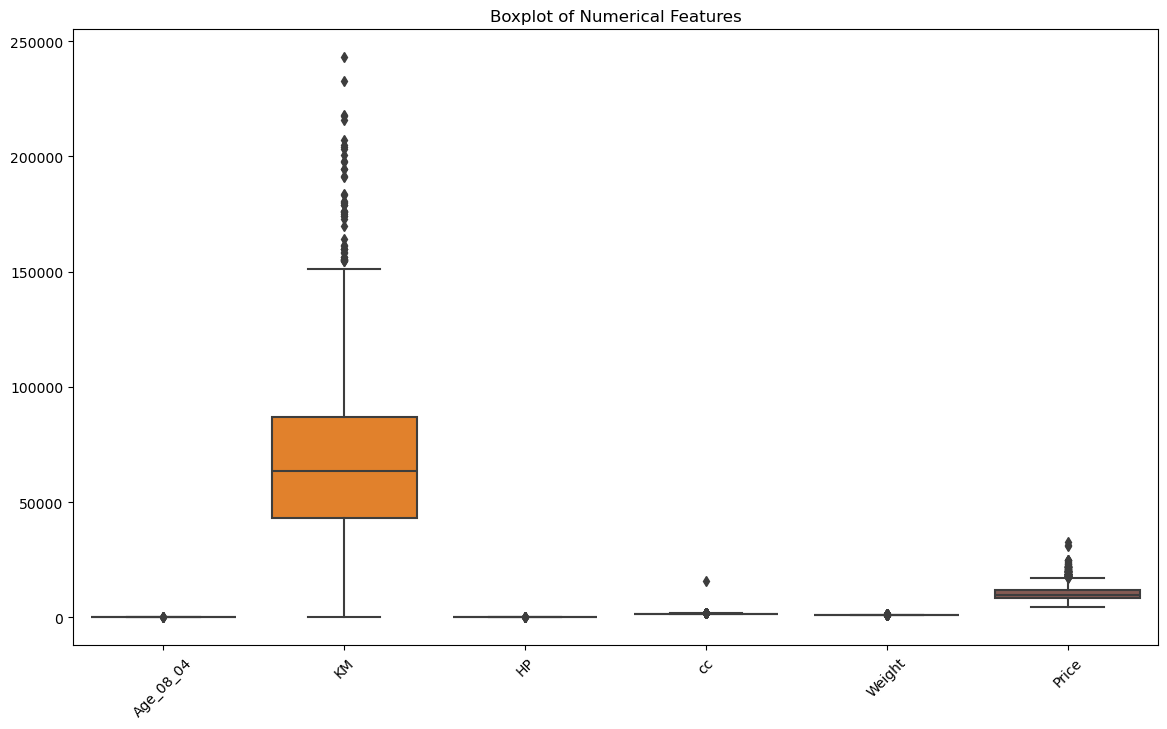

Columns in DataFrame: Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')
   Price  Age_08_04     KM  HP  Automatic    cc  Cylinders  Gears  Weight  \
0  13500         23  46986  90          0  2000          4      5    1165   
1  13750         23  72937  90          0  2000          4      5    1165   
2  13950         24  41711  90          0  2000          4      5    1165   
3  14950         26  48000  90          0  2000          4      5    1165   
4  13750         30  38500  90          0  2000          4      5    1170   

   Fuel_Type_Diesel  Fuel_Type_Petrol  
0              True             False  
1              True             False  
2              True             False  
3              True             False  
4              True             False  
Training set size: 1148
Test set size: 288
Mean Squared Error: 2187147.670282137
R-squared: 0.836080170652289
                   Co

In [2]:
import pandas as pd
# Load the dataset
df = pd.read_csv(Data.csv)

# Display the first few rows of the dataset
print(df.head())
# Summary statistics
print(df.describe())

# Summary of categorical variables
print(df.describe(include=['object']))
import matplotlib.pyplot as plt
import seaborn as sns

# Print columns to verify
print("Available columns:", df.columns)

# Define the list of columns to plot
columns_to_plot = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Price']

# Check for missing columns
missing_columns = [col for col in columns_to_plot if col not in df.columns]
if missing_columns:
    print(f"Warning: Missing columns: {missing_columns}")
else:
    # Plotting the boxplot
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df[columns_to_plot])
    plt.xticks(rotation=45)
    plt.title('Boxplot of Numerical Features')
    plt.show()
import pandas as pd

# Sample DataFrame loading (replace with your actual data loading code)
# df = pd.read_csv('toyota_corolla.csv')

# Print columns to verify
print("Columns in DataFrame:", df.columns)

# Assuming 'FuelType' is incorrectly named and the actual column is 'Fuel_Type'
# Correct column name should be used here
correct_column_name = 'Fuel_Type'  # Update this if the name is different

if correct_column_name in df.columns:
    df_encoded = pd.get_dummies(df, columns=[correct_column_name], drop_first=True)
    df_encoded['Automatic'] = df_encoded['Automatic'].astype(int)  # Ensure Automatic is integer

    # Drop irrelevant columns if necessary
    # Example: Dropping 'Doors' if not useful
    if 'Doors' in df_encoded.columns:
        df_encoded = df_encoded.drop(columns=['Doors'])

    print(df_encoded.head())
else:
    print(f"Column '{correct_column_name}' is not in the DataFrame.")
from sklearn.model_selection import train_test_split

# Define the feature columns and target variable
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample dataset creation (replace this with loading your actual dataset)
data = {
    'Age': [5, 10, 2, 3, 8],
    'KM': [50000, 60000, 30000, 20000, 40000],
    'FuelType': ['Petrol', 'Diesel', 'Petrol', 'CNG', 'Diesel'],
    'HP': [100, 150, 120, 80, 140],
    'Automatic': [1, 0, 1, 0, 1],
    'CC': [1500, 2000, 1800, 1400, 2200],
    'Doors': [4, 4, 2, 2, 4],
    'Weight': [1200, 1500, 1100, 1000, 1600],
    'Quarterly_Tax': [200, 300, 150, 100, 250],
    'Price': [15000, 12000, 18000, 20000, 16000]
}

df = pd.DataFrame(data)

# Encoding categorical variables
df = pd.get_dummies(df, columns=['FuelType'], drop_first=True)

# Splitting data into features and target variable
X = df.drop('Price', axis=1)  # Features
y = df['Price']               # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (4, 10)
Testing set shape: (1, 10)


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Load your dataset (replace 'your_dataset.csv' with your actual file)
data = pd.read_csv(Data.csv)

# Assuming your target variable is 'target' and features are in columns 'feature1', 'feature2', ..., 'featureN'
X = data[['Age_08_04', 'KM', 'HP']]  # Replace with actual feature names
y = data['Price']  # Replace with the actual target column name

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize and train the model
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred1 = model1.predict(X_test_scaled)
mse1 = mean_squared_error(y_test, y_pred1)

print("Model 1 Coefficients:", model1.coef_)
print("Model 1 Intercept:", model1.intercept_)
print("Model 1 Mean Squared Error:", mse1)
from sklearn.linear_model import Ridge

# Initialize and train the model
model2 = Ridge(alpha=1.0)  # alpha is the regularization strength
model2.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred2 = model2.predict(X_test_scaled)
mse2 = mean_squared_error(y_test, y_pred2)

print("Model 2 Coefficients:", model2.coef_)
print("Model 2 Intercept:", model2.intercept_)
print("Model 2 Mean Squared Error:", mse2)
from sklearn.linear_model import Lasso

# Initialize and train the model
model3 = Lasso(alpha=0.1)  # alpha is the regularization strength
model3.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred3 = model3.predict(X_test_scaled)
mse3 = mean_squared_error(y_test, y_pred3)

print("Model 3 Coefficients:", model3.coef_)
print("Model 3 Intercept:", model3.intercept_)
print("Model 3 Mean Squared Error:", mse3)


Model 1 Coefficients: [-2883.99658744  -426.33040876   514.54182956]
Model 1 Intercept: 10754.395470383275
Model 1 Mean Squared Error: 2530780.7798338947
Model 2 Coefficients: [-2880.87085022  -427.68092513   514.11320508]
Model 2 Intercept: 10754.395470383275
Model 2 Mean Squared Error: 2531377.6683126274
Model 3 Coefficients: [-2883.9267632   -426.29151613   514.46567198]
Model 3 Intercept: 10754.395470383275
Model 3 Mean Squared Error: 2530832.783835835


In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Model 1: Linear Regression
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_test, y_pred1)

print("Model 1: Linear Regression")
print("Mean Squared Error (MSE):", mse1)
print("Root Mean Squared Error (RMSE):", rmse1)
print("R-squared (R²):", r2_1)
print()

# Model 2: Ridge Regression
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test, y_pred2)

print("Model 2: Ridge Regression")
print("Mean Squared Error (MSE):", mse2)
print("Root Mean Squared Error (RMSE):", rmse2)
print("R-squared (R²):", r2_2)
print()

# Model 3: Lasso Regression
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y_test, y_pred3)

print("Model 3: Lasso Regression")
print("Mean Squared Error (MSE):", mse3)
print("Root Mean Squared Error (RMSE):", rmse3)
print("R-squared (R²):", r2_3)


Model 1: Linear Regression
Mean Squared Error (MSE): 2530780.7798338947
Root Mean Squared Error (RMSE): 1590.8427891636227
R-squared (R²): 0.8103259513824574

Model 2: Ridge Regression
Mean Squared Error (MSE): 2531377.6683126274
Root Mean Squared Error (RMSE): 1591.030379443657
R-squared (R²): 0.810281216470909

Model 3: Lasso Regression
Mean Squared Error (MSE): 2530832.783835835
Root Mean Squared Error (RMSE): 1590.859133875729
R-squared (R²): 0.8103220538463014


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load your dataset (replace 'your_dataset.csv' with your actual file)
data = pd.read_csv(Data.csv)

# Prepare features and target variable (replace with your actual column names)
X = data[['Age_08_04', 'KM', 'HP']]  # Replace with actual feature names
y = data['Price']  # Replace with the actual target column name

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Ridge Regression
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate Ridge model
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression")
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)
print("Mean Squared Error (MSE):", mse_ridge)
print("Root Mean Squared Error (RMSE):", rmse_ridge)
print("R-squared (R²):", r2_ridge)
print()

# Apply Lasso Regression
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate Lasso model
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression")
print("Coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)
print("Mean Squared Error (MSE):", mse_lasso)
print("Root Mean Squared Error (RMSE):", rmse_lasso)
print("R-squared (R²):", r2_lasso)


Ridge Regression
Coefficients: [-2880.87085022  -427.68092513   514.11320508]
Intercept: 10754.395470383275
Mean Squared Error (MSE): 2531377.6683126274
Root Mean Squared Error (RMSE): 1591.030379443657
R-squared (R²): 0.810281216470909

Lasso Regression
Coefficients: [-2883.9267632   -426.29151613   514.46567198]
Intercept: 10754.395470383275
Mean Squared Error (MSE): 2530832.783835835
Root Mean Squared Error (RMSE): 1590.859133875729
R-squared (R²): 0.8103220538463014
